## Comparing distributions

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#1 get the data

gan_samples = np.load('./../Experiments_Data/generated_data.npy')
training_samples = np.load('./../Experiments_Data/training_data.npy')
folk_rnn_samples = np.load('./../Experiments_Data/folkRnn_data.npy', allow_pickle=True)
magenta_samples = np.load('./../Experiments_Data/magenta_generated.npy', allow_pickle=True)

size = min(gan_samples.shape[0], training_samples.shape[0], folk_rnn_samples.shape[0], magenta_samples.shape[0])

training_samples_selected = np.random.permutation(training_samples)[:size]
gan_samples_selected = np.random.permutation(gan_samples)[:size]
magenta_samples_selected = np.random.permutation(magenta_samples)[:size]

## 1. t-SNE comparision

In [19]:
from sklearn.manifold import TSNE

folk_tsne = TSNE(n_components=2, perplexity=50).fit_transform(folk_rnn_samples)
data_tsne = TSNE(n_components=2, perplexity=50).fit_transform(training_samples_selected)
gen_tsne = TSNE(n_components=2, perplexity=50).fit_transform(gan_samples_selected)
magenta_tsne = TSNE(n_components=2, perplexity=50).fit_transform(magenta_samples_selected)

#gen_tsne = TSNE(n_components=2).fit_transform(gen_samples)

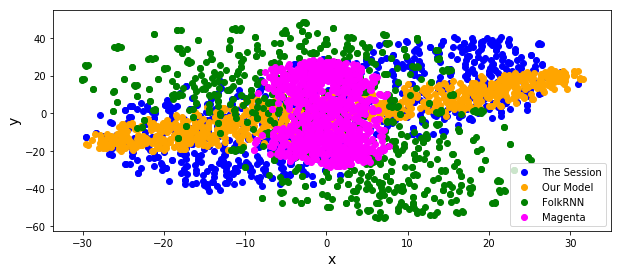

In [20]:
FIG_SIZE = (10, 10)
TITLE_FONT_SIZE = 30
FONT_SIZE = 14
LEGEND_FONT_SIZE = 16
title = 'Visualizing Distributions using TSNE'
xlabel, ylabel = 'x', 'y'


# ------------------- Format ----------------------------

fig = plt.figure(figsize=FIG_SIZE) # Creates a new figure
f1 = fig.add_subplot(211)# add a subplot to the new figure, 111 means "1x1 grid, first subplot"
fig.subplots_adjust(top=0.80) # adjust the placing of subplot, adjust top, bottom, left and right spacing

f1.set_xlabel(xlabel,fontsize = FONT_SIZE) #xlabel
f1.set_ylabel(ylabel, fontsize = FONT_SIZE)#ylabel

plt.scatter(data_tsne[:,0], data_tsne[:,1], c='blue', label='The Session')
plt.scatter(gen_tsne[:,0], gen_tsne[:,1], c='orange', label='Our Model')
plt.scatter(folk_tsne[:,0], folk_tsne[:,1], c='green', label='FolkRNN')
plt.scatter(magenta_tsne[:,0], magenta_tsne[:,1], c='magenta', label='Magenta')


f1.legend()
plt.show()

#fig.savefig('test.jpg')